In [1]:
import andes
andes.config_logger(stream_level=20)

import os

Find the approriate load scaling factor

In [2]:
dir_path = os.path.abspath('..')
case14_src = '/case/ieee14_base.xlsx'
case39_src = '/case/ieee39_ev2.xlsx'
case14 = dir_path + case14_src
case39 = dir_path + case39_src

ssa = andes.load(case14,
                 setup=True,
                 no_output=True,
                 default_config=False)

Working directory: "/Users/jinningwang/Documents/work/andes/jwang/notes"
> Loaded config from file "/Users/jinningwang/.andes/andes.rc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Parsing input file "/Users/jinningwang/Documents/work/andes/jwang/case/ieee14_base.xlsx"...
Input file parsed in 0.2802 seconds.
System internal structure set up in 0.0222 seconds.


In [3]:
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

In [4]:
ssa.PFlow.run()
ssa.TDS.config.tf = 2
ssa.TDS.run()

load_step = 1
load_0 = ssa.PQ.get(src='Ppf', idx='PQ_4', attr='v')
ssa.PQ.set(src='Ppf', idx='PQ_4', attr='v', value=load_step + load_0)
ssa.TDS.config.tf = 20
ssa.TDS.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.2304 seconds.
0: |F(x)| = 0.5605182162
1: |F(x)| = 0.006127943757
2: |F(x)| = 5.694809117e-06
3: |F(x)| = 5.725184216e-12
Converged in 4 iterations in 0.0033 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-2 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Numba compilation initiated with caching.
Initialization for dynamics completed in 0.2369 seconds.
Initialization was successful.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation completed in 0.0594 seconds.


  0%|          | 0/100 [00:00<?, ?%/s]

Simulation completed in 1.2077 seconds.


True

Bias: MW/Hz

ieee14: 10.69 (step=1)

ieee39: 350

bias=10.69


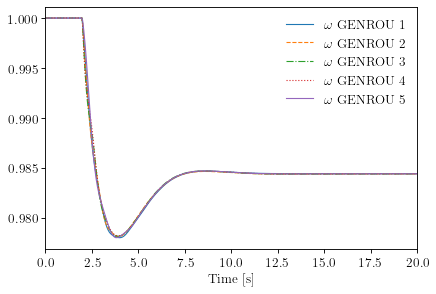

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [5]:
bias = load_step * ssa.config.mva / ( ssa.config.freq * (1 - ssa.COI.omega.v[0]) * 10)
print('bias={:.2f}'.format(bias))
ssa.TDS.plt.plot(ssa.GENROU.omega)